In [ ]:
from google.colab import drive
import time

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from math import nan, isnan
from mlxtend.frequent_patterns import apriori


In [ ]:
df_book_ratings = pd.read_csv('/content/gdrive/MyDrive/Ratings.csv',encoding='unicode_escape')
df_books = pd.read_csv('/content/gdrive/MyDrive/Books.csv')
df_users = pd.read_csv('/content/gdrive/MyDrive/Users.csv',encoding='unicode_escape')



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_book_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:

df_final = pd.merge(df_book_ratings,df_books,on = ['ISBN'],how='left')

In [ ]:
df_final = pd.merge(df_final,df_users, on= ['User-ID'], how='left')

In [ ]:
df_null  = df_final[df_final['Book-Title'].isnull()]

In [ ]:
df_null

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
6,276736,3257224281,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"salzburg, salzburg, austria",NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"sydney, new south wales, australia",14.0
9,276745,342310538,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"berlin, berlin, germany",27.0
25,276748,3442437407,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jubail ind.-city, eastern province, saudi arabia",39.0
26,276751,033390804X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"zuerich, zh, switzerland",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1149444,276675,0747252327,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"mooroolbark, victoria, australia",57.0
1149446,276679,8804413530,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"beverly hills, yukon territory, vietnam",NaN
1149581,276680,0679781587,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"hopewell junction, new york, usa",55.0
1149758,276697,8445072897,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"oviedo, asturias, spain",29.0


In [ ]:
df_drop_null = df_final.dropna()

In [ ]:
df_drop_null = df_drop_null.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)

In [ ]:
df_drop_null

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.0
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,"paris, n/a, france",37.0
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,"iowa city, iowa, usa",25.0
...,...,...,...,...,...,...,...,...,...
1149756,276690,0590581066,0,Triplet Trouble and the Red Heart Race (Triple...,Debbie Dadey,1996,Scholastic Paperbacks,"wakeman, ohio, usa",43.0
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,"wakeman, ohio, usa",43.0
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,"quebec, quebec, canada",18.0
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,"mannington, west virginia, usa",38.0


In [ ]:
most_read = df_drop_null['Book-Title'].value_counts().reset_index()
most_read.columns = ['Book-Title', 'COUNT']

In [ ]:


most_read.shape

(205170, 2)

In [ ]:
atleast_50_books = most_read[most_read['COUNT'] >= 50]

In [ ]:
df_final = pd.merge(atleast_50_books,df_drop_null, on= ['Book-Title'], how='left')

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final

,Book-Title,COUNT,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,Wild Animus,2141,276925,0971880107,0,Rich Shapero,2004,Too Far,"barcelona, barcelona, spain",22.0
1,Wild Animus,2141,276939,0971880107,0,Rich Shapero,2004,Too Far,"poissy, yvelines, france",23.0
2,Wild Animus,2141,276954,0971880107,0,Rich Shapero,2004,Too Far,"freiburg, baden-wuerttemberg, germany",43.0
3,Wild Animus,2141,277157,0971880107,0,Rich Shapero,2004,Too Far,"garden grove, california, usa",70.0
4,Wild Animus,2141,277378,0971880107,0,Rich Shapero,2004,Too Far,"vancouver, british columbia, canada",33.0
...,...,...,...,...,...,...,...,...,...,...
169254,Sister of My Heart,50,270713,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,"toronto, ontario, canada",27.0
169255,Sister of My Heart,50,273086,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,"chicago, illinois, usa",33.0
169256,Sister of My Heart,50,273587,038548951X,0,Chitra Banerjee Divakaruni,2000,Anchor Pub,"den haag, zuid-holland, netherlands",60.0
169257,Sister of My Heart,50,274004,038548951X,8,Chitra Banerjee Divakaruni,2000,Anchor Pub,"sydenham, london, england, united kingdom",41.0


In [ ]:
atleast_50_books

,Book-Title,COUNT
0,Wild Animus,2141
1,The Lovely Bones: A Novel,920
2,The Da Vinci Code,708
3,Bridget Jones's Diary,599
4,The Nanny Diaries: A Novel,573
...,...,...
1568,Hornet Flight,50
1569,Passage,50
1570,Last Orders,50
1571,Confessions of a Sociopathic Social Climber : ...,50


In [ ]:
most_user = df_drop_null['User-ID'].value_counts().reset_index()
most_user.columns = ['User-ID', 'COUNT']

In [ ]:
atleast_200_users = most_user[most_user['COUNT'] >= 200]

In [ ]:
df_final = pd.merge(atleast_200_users,df_final, on= ['User-ID'], how='left')

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final

,User-ID,COUNT_x,Book-Title,COUNT_y,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,"newport news, virginia, usa",51.0


In [ ]:
df_final = df_final.rename(columns = {'COUNT_x':'Books_User_Rated','COUNT_y':'Book_Was_Rated'})

In [ ]:
df_final

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,"newport news, virginia, usa",51.0


# Above we read the data, and cleaned the data.
1.   Removed null values
2.   Books who got rated atleast 50 times
3.   Users who rated atleast 200 books.





In [ ]:
import seaborn as sns

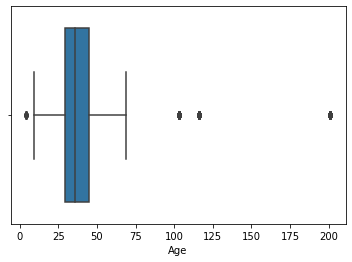

In [ ]:
sns.boxplot(data = df_final, x='Age')

In [ ]:
df_final = df_final[df_final['Age']<100]

In [ ]:
df_final = df_final[df_final['Age']>4]

In [ ]:
df_final['Age'].max()

69.0

In [ ]:
df_final

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0
1,198711,6456,A Painted House,517,044023722X,0,John Grisham,2001,Dell Publishing Company,"little canada, minnesota, usa",62.0
2,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0
3,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0
4,198711,6456,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,0,J. K. Rowling,2000,Scholastic,"little canada, minnesota, usa",62.0
...,...,...,...,...,...,...,...,...,...,...,...
69948,141902,200,SEAT OF THE SOUL,61,067169507X,10,Gary Zukav,1990,Free Press,"newport news, virginia, usa",51.0
69949,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0
69950,141902,200,Gap Creek: The Story of a Marriage,58,074322535X,10,Robert Morgan,2001,Touchstone,"newport news, virginia, usa",51.0
69951,141902,200,True Betrayals,53,0515118559,0,Nora Roberts,1996,Jove Books,"newport news, virginia, usa",51.0


In [ ]:
df_final['Age'].describe()

count    69531.000000
mean        37.392300
std         10.917806
min          9.000000
25%         29.000000
50%         36.000000
75%         45.000000
max         69.000000
Name: Age, dtype: float64

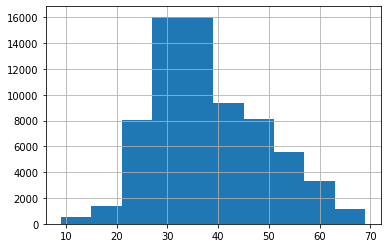

In [ ]:
df_final['Age'].hist()

# **After plotting boxplot we realized that the people above 100 years old and below 4 years old were outliers. So filtered them out.**

In [ ]:
df_final_list = df_final.groupby('User-ID')['Book-Title'].apply(list).reset_index()

In [ ]:
df_final_list

,User-ID,Book-Title
0,254,"[Bridget Jones's Diary, The Secret Life of Bee..."
1,2276,"[The Runaway Jury, The Brethren, The King of T..."
2,2766,"[Wild Animus, The Lovely Bones: A Novel, The S..."
3,2977,"[Wild Animus, The Testament, The Firm, Jurassi..."
4,3363,"[Wild Animus, The Lovely Bones: A Novel, The D..."
...,...,...
636,274301,"[Wild Animus, The Nanny Diaries: A Novel, The ..."
637,274308,"[The Da Vinci Code, Bridget Jones's Diary, Ang..."
638,275970,"[The Secret Life of Bees, Divine Secrets of th..."
639,277427,"[Wild Animus, The Lovely Bones: A Novel, The D..."


In [ ]:
df_lst = df_final_list['Book-Title'].to_list()

In [ ]:

te = TransactionEncoder()


In [ ]:
te_arr = te.fit(df_lst).transform(df_lst)

In [ ]:
df_ap = pd.DataFrame(te_arr, columns=te.columns_)

In [ ]:
df_ap

,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,3rd Degree,4 Blondes,84 Charing Cross Road,...,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wouldn't Take Nothing for My Journey Now,Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
637,False,False,False,False,False,False,True,True,False,False,...,False,False,True,True,False,False,False,False,False,False
638,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
639,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_sets = apriori(df_ap,min_support = 0.1, use_colnames=True)

In [ ]:
frequent_sets

,support,itemsets
0,0.179407,(1st to Die: A Novel)
1,0.137285,(2nd Chance)
2,0.126365,(A Bend in the Road)
3,0.101404,"(A Child Called \It\"": One Child's Courage to ..."
4,0.162246,(A Is for Alibi (Kinsey Millhone Mysteries (Pa...
...,...,...
317,0.104524,"(Wild Animus, To Kill a Mockingbird)"
318,0.101404,"(Wild Animus, Tuesdays with Morrie: An Old Man..."
319,0.109204,"(Wild Animus, Where the Heart Is (Oprah's Book..."
320,0.101404,"(The Pelican Brief, The Client, A Time to Kill)"


In [ ]:
confidence_1 = association_rules(frequent_sets, metric="confidence",
                  min_threshold=0.4).sort_values('lift', ascending=False)

In [ ]:
confidence_1.to_excel("rules.xlsx")

In [ ]:
confidence_1.to_csv('data.xlsx')
!cp data.xlsx "/content/gdrive/MyDrive"

In [ ]:
df_final['ISBN'] = df_final['ISBN'].apply(lambda x: x.zfill(10))


In [ ]:
lst_book = df_final['ISBN'].to_list()

In [ ]:
lst_book = list(set(lst_book))

In [ ]:
confidence_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
59,(Harry Potter and the Goblet of Fire (Book 4)),(Harry Potter and the Prisoner of Azkaban (Boo...,0.146646,0.162246,0.110764,0.755319,4.655381,0.086972,3.423862
58,(Harry Potter and the Prisoner of Azkaban (Boo...,(Harry Potter and the Goblet of Fire (Book 4)),0.162246,0.146646,0.110764,0.682692,4.655381,0.086972,2.689358
55,(Harry Potter and the Prisoner of Azkaban (Boo...,(Harry Potter and the Chamber of Secrets (Book...,0.162246,0.204368,0.126365,0.778846,3.810995,0.093207,3.597640
54,(Harry Potter and the Chamber of Secrets (Book...,(Harry Potter and the Prisoner of Azkaban (Boo...,0.204368,0.162246,0.126365,0.618321,3.810995,0.093207,2.194914
53,(Harry Potter and the Goblet of Fire (Book 4)),(Harry Potter and the Chamber of Secrets (Book...,0.146646,0.204368,0.112324,0.765957,3.747929,0.082355,3.399518
...,...,...,...,...,...,...,...,...,...
92,(The Da Vinci Code),(Wild Animus),0.268331,0.439938,0.127925,0.476744,1.083663,0.009876,1.070341
35,(Bridget Jones's Diary),(Wild Animus),0.290172,0.439938,0.137285,0.473118,1.075421,0.009628,1.062976
97,(The Firm),(Wild Animus),0.255850,0.439938,0.120125,0.469512,1.067225,0.007567,1.055750
27,(Angels &amp; Demons),(Wild Animus),0.229329,0.439938,0.107644,0.469388,1.066942,0.006754,1.055502


# We implemeted aprioiri algorithm. We didn't use it in the final webapp but the results are stored in books folder.

# **We scrapped additional information from the googlr api. We scrapped description and genre. I commented the code, since we don't want to run it again and again. Description scrape code is in a separate file desc_script.py**

In [ ]:
# import json
# from urllib.request import urlopen
# import time

In [ ]:
# from tqdm import tqdm
# chunk_size = 300
# lst_book1 = [lst_book[i:i + chunk_size] for i in range(0, len(lst_book), chunk_size)]


In [ ]:
# isbn_book = []
# genre_book = []
# api = "https://www.googleapis.com/books/v1/volumes?q=isbn:"
# for book in tqdm(lst_book1[12]):
#   isbn = book.strip()

#   resp = urlopen(api + isbn)
#   book_data = json.load(resp)
#   if 'items' in book_data and 'volumeInfo' in book_data['items'][0]:
#         isbn_book.append(book_data['items'][0]['volumeInfo']['industryIdentifiers'][0]['identifier'])
#         if 'categories' in book_data['items'][0]['volumeInfo']:
#             genre_book.append(book_data['items'][0]['volumeInfo']['categories'][0])
#         else:
#             genre_book.append("no category")
#   else:
#     isbn_book.append("no book")
#     genre_book.append("no category")
#   time.sleep(5)

# df_genre = pd.DataFrame({'ISBN':isbn_book,'Genre':genre_book})


In [ ]:
# df_genre = pd.DataFrame()

# for i in range(14):

#   df = pd.read_csv(f'/content/gdrive/MyDrive/book_genre/chunk{i+1}.csv')
#   df = df.drop('Unnamed: 0',axis=1)
#   df_genre = pd.concat([df_genre,df])

In [ ]:


df_clean_genre = pd.read_excel('/content/gdrive/MyDrive/book_genre/genre.xlsx')

In [ ]:
df_clean_genre

,Unnamed: 0,ISBN,Genre
0,0,0451167856,Fiction
1,1,0399148817,Fiction
2,2,0671727583,Fiction
3,3,9780385335836,Fiction
4,5,051512608X,Fiction
...,...,...,...
2388,72,0802134475,Fiction
2389,73,9780679457527,Travel
2390,74,0812558626,Fiction
2391,75,9780553213164,Juvenile Fiction


In [ ]:
df_clean_genre['Genre'] = df_clean_genre['Genre'].apply(lambda x : x.lower())

In [ ]:
df_clean_genre['Genre'].value_counts()

fiction                        1763
juvenile fiction                119
biography & autobiography        53
humor                            19
horror tales                     12
                               ... 
time travel                       1
language arts & disciplines       1
geishas                           1
totalitarianism                   1
bereavement                       1
Name: Genre, Length: 236, dtype: int64

In [ ]:
df_clean_genre = df_clean_genre.drop('Unnamed: 0',axis=1)

In [ ]:




df_clean_genre['Genre']

0                fiction
1                fiction
2                fiction
3                fiction
4                fiction
              ...       
2388             fiction
2389              travel
2390             fiction
2391    juvenile fiction
2392             fiction
Name: Genre, Length: 2393, dtype: object

In [ ]:
df_final_c = pd.merge(df_final,df_clean_genre, on= ['ISBN'], how='left')

In [ ]:
df_final_c = df_final_c.dropna()

In [ ]:
df_final_c['Genre'].value_counts()

fiction                      23620
juvenile fiction              1016
biography & autobiography      615
humor                          347
social science                 164
                             ...  
christianity                     1
college teachers                 1
utah                             1
african american authors         1
rape victims                     1
Name: Genre, Length: 212, dtype: int64

In [ ]:
df_final_c.to_excel("/content/gdrive/MyDrive/book_genre/final_book.xlsx")

In [ ]:
df_final['Book-Title'].value_counts()

Wild Animus                                                               282
The Lovely Bones: A Novel                                                 214
Bridget Jones's Diary                                                     212
The Notebook                                                              181
The Nanny Diaries: A Novel                                                177
                                                                         ... 
The Wasp Factory                                                            9
Northern Lights (His Dark Materials S.)                                     8
Dead Famous                                                                 6
Horse Whisperer                                                             6
Stupid White Men. Eine Abrechnung mit dem Amerika unter George W. Bush      1
Name: Book-Title, Length: 1572, dtype: int64

In [ ]:
df_final_c['Book-Rating'].value_counts()

0     22647
8      1686
10     1593
9      1411
7       976
5       493
6       365
4        88
3        44
2        29
1        26
Name: Book-Rating, dtype: int64

In [ ]:
df_plot = pd.DataFrame()

In [ ]:
plot_df = df_final_c[['User-ID','Book-Title','Book-Rating']]

In [ ]:
plot_df = plot_df.set_index('Book-Title')


In [ ]:
df_final_c[df_final_c['User-ID'] == 254]

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre
54509,254,300,Bridget Jones's Diary,599,014028009X,0,Helen Fielding,1999,Penguin Books,"minneapolis, minnesota, usa",24.0,fiction
54511,254,300,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"minneapolis, minnesota, usa",24.0,fiction
54514,254,300,Snow Falling on Cedars,415,067976402X,0,David Guterson,1995,Vintage Books USA,"minneapolis, minnesota, usa",24.0,fiction
54517,254,300,She's Come Undone (Oprah's Book Club),340,0671021001,7,Wally Lamb,1998,Pocket,"minneapolis, minnesota, usa",24.0,fiction
54519,254,300,Harry Potter and the Prisoner of Azkaban (Book 3),333,0439136369,9,J. K. Rowling,2001,Scholastic,"minneapolis, minnesota, usa",24.0,juvenile fiction
54521,254,300,Me Talk Pretty One Day,327,0316776963,0,David Sedaris,2001,Back Bay Books,"minneapolis, minnesota, usa",24.0,humor
54523,254,300,The Poisonwood Bible: A Novel,321,0060930535,0,Barbara Kingsolver,1999,Perennial,"minneapolis, minnesota, usa",24.0,fiction
54524,254,300,Harry Potter and the Goblet of Fire (Book 4),295,0439139597,9,J. K. Rowling,2000,Scholastic,"minneapolis, minnesota, usa",24.0,bildungsromans
54525,254,300,Harry Potter and the Order of the Phoenix (Boo...,293,043935806X,0,J. K. Rowling,2003,Scholastic,"minneapolis, minnesota, usa",24.0,bildungsromans
54526,254,300,The Fellowship of the Ring (The Lord of the Ri...,273,0618002227,8,J. R. R. Tolkien,1999,Houghton Mifflin Company,"minneapolis, minnesota, usa",24.0,fantasy fiction


In [ ]:
p = pd.pivot_table(df_final, values='Book-Rating', index='Book-Title',
                    columns=['User-ID'])


In [ ]:
p

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [ ]:
p = p.fillna(0)

In [ ]:
p.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Implementing KNN**

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(p.values)
distances, indices = knn.kneighbors(p.values, n_neighbors=5)

In [ ]:
def knn(u):
  p = pd.pivot_table(df_final, values='Book-Rating', index='Book-Title',
                    columns=['User-ID'])

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(p.values)
  distances, indices = knn.kneighbors(p.values, n_neighbors=5)
  p_r = p.reset_index()
  lst = []
  lst1 = []
  lst2 = []
  lst3 = []
  lst4 = []


  for value in indices:
    for x in range(len(value)):
    
      lst.append(p_r.iloc[value[x]]['Book-Title'])
      lst1.append(p_r.iloc[value[x+1]]['Book-Title'])
      lst2.append(p_r.iloc[value[x+2]]['Book-Title'])
      lst3.append(p_r.iloc[value[x+3]]['Book-Title'])
      lst4.append(p_r.iloc[value[x+4]]['Book-Title'])
      
      
      break
  df_rec = pd.DataFrame({'Book':lst,'Similar-book1':lst1,'Similar-book2':lst2,'Similar-book3':lst3,'Similar-book4':lst4})
  df_rec =  df_rec.drop_duplicates()
  read, rec = user(u)
  sim_books = []
  sim_dists = []
  for i in rec:

      k = indices[i]
      d =distances[i]
      sim = []
      dist = []
      for j in range(0,k.shape[0]):
      
        sim.append(k[j])
        dist.append(d[j])
      
      sim_books.append(sim)
      sim_dists.append(dist)
      ratings = []
  df_new = df_final[df_final['User-ID']==u]
  for i in sim_books:
      r = []
      for j in i:
        b = p_r.iloc[j]['Book-Title']
        k = df_new[df_new['Book-Title']== b]['Book-Rating'].to_list()
        if len(k) >0:
          r.append(k[0])
        else:
          r.append(0)
      ratings.append(r)
      pred= []
  for i in range(len(sim_books)):
    pred.append(np.sum(np.array(sim_dists[i])*np.array(ratings[i]))/np.sum(sim_dists[i]))
  b_title = []
  for i in sim_books:
    b_title.append(p_r.iloc[i[0]]['Book-Title'])

  d_pred = pd.DataFrame({'Book':b_title,'Rating_pred':pred})

  return d_pred
  






In [ ]:
distances.shape

(1572, 5)

In [ ]:
p_r = p.reset_index()

In [ ]:
p_r

User-ID,Book-Title,254,2276,2766,2977,3363,4017,4385,6251,6323,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
0,16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,Zen and the Art of Motorcycle Maintenance: An ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
lst = []
lst1 = []
lst2 = []
lst3 = []
lst4 = []


for value in indices:
  for x in range(len(value)):
   
    lst.append(p_r.iloc[value[x]]['Book-Title'])
    lst1.append(p_r.iloc[value[x+1]]['Book-Title'])
    lst2.append(p_r.iloc[value[x+2]]['Book-Title'])
    lst3.append(p_r.iloc[value[x+3]]['Book-Title'])
    lst4.append(p_r.iloc[value[x+4]]['Book-Title'])
    
    
    break

In [ ]:
df_rec = pd.DataFrame({'Book':lst,'Similar-book1':lst1,'Similar-book2':lst2,'Similar-book3':lst3,'Similar-book4':lst4})


In [ ]:
df_rec =  df_rec.drop_duplicates()

In [ ]:
df_rec.shape

(1564, 5)

In [ ]:
df_rec.to_excel('/content/gdrive/MyDrive/book_genre/book_rec.xlsx')

**KNN results**

In [ ]:
p_r

User-ID,Book-Title,254,2276,2766,2977,3363,4017,4385,6251,6323,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
0,16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,Zen and the Art of Motorcycle Maintenance: An ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
u = 254

In [ ]:
p

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def user(u):
  read = []
  recs = []
  for m in p_r[p_r[u] > 0][u].index.tolist():
    read.append(m)
  for m in p_r[p_r[u] ==0][u].index.tolist():
    recs.append(m)
  return read, recs

In [ ]:
read, rec = user(u)

In [ ]:
read

[1,
 90,
 108,
 491,
 492,
 494,
 495,
 736,
 942,
 994,
 1077,
 1132,
 1168,
 1196,
 1219,
 1259,
 1366,
 1389]

In [ ]:
sim_books = []
sim_dists = []
for i in rec:

    k = indices[i]
    d =distances[i]
    sim = []
    dist = []
    for j in range(0,k.shape[0]):
     
      sim.append(k[j])
      dist.append(d[j])
    
    sim_books.append(sim)
    sim_dists.append(dist)
      
        
  
    

In [ ]:
p_r

User-ID,Book-Title,254,2276,2766,2977,3363,4017,4385,6251,6323,...,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639
0,16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,Zen and the Art of Motorcycle Maintenance: An ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings = []
df_new = df_final_c[df_final_c['User-ID']==u]
for i in sim_books:
  r = []
  for j in i:
    b = p_r.iloc[j]['Book-Title']
    k = df_new[df_new['Book-Title']== b]['Book-Rating'].to_list()
    if len(k) >0:
      r.append(k[0])
    else:
      r.append(0)
  ratings.append(r)
    



In [ ]:
ratings

# **Item-Item from scratch**

In [ ]:
pred= []
for i in range(len(sim_books)):
  pred.append(np.sum(np.array(sim_dists[i])*np.array(ratings[i]))/np.sum(sim_dists[i]))




In [ ]:
b_title = []
for i in sim_books:
  b_title.append(p_r.iloc[i[0]]['Book-Title'])

d_pred = pd.DataFrame({'Book':b_title,'Rating_pred':pred})
  

In [ ]:
d_pred.to_excel('/content/gdrive/MyDrive/book_genre/book_rec_257.xlsx')

In [ ]:
df_final[df_final['User-ID']==u]

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age
54836,254,300,Bridget Jones's Diary,599,014028009X,0,Helen Fielding,1999,Penguin Books,"minneapolis, minnesota, usa",24.0
54837,254,300,The Secret Life of Bees,547,0142001740,9,Sue Monk Kidd,2003,Penguin Books,"minneapolis, minnesota, usa",24.0
54838,254,300,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"minneapolis, minnesota, usa",24.0
54839,254,300,Harry Potter and the Chamber of Secrets (Book 2),425,0439064864,9,J. K. Rowling,1999,Scholastic,"minneapolis, minnesota, usa",24.0
54840,254,300,Harry Potter and the Chamber of Secrets (Book 2),425,0439064872,9,J. K. Rowling,2000,Scholastic,"minneapolis, minnesota, usa",24.0
...,...,...,...,...,...,...,...,...,...,...,...
54918,254,300,James and the Giant Peach,54,0375814248,0,ROALD DAHL,2002,Knopf Books for Young Readers,"minneapolis, minnesota, usa",24.0
54919,254,300,The Death of Vishnu: A Novel,54,006000438X,0,Manil Suri,2002,Perennial,"minneapolis, minnesota, usa",24.0
54920,254,300,"The Lion, the Witch, and the Wardrobe (The Chr...",53,0064471047,7,C. S. Lewis,1994,HarperCollins,"minneapolis, minnesota, usa",24.0
54921,254,300,Hitchhikers's Guide to the Galaxy,53,0671527215,0,Douglas Adams,1984,Pocket,"minneapolis, minnesota, usa",24.0


# Popularity based

In [ ]:
R = df_final_c.groupby('ISBN').mean().reset_index()[['ISBN','Book-Rating']]

In [ ]:
M = 50

In [ ]:
R = R.rename(columns={'Book-Rating':'Avg-Rating'})

In [ ]:
df_pop = df_final_c.copy()

In [ ]:
df_pop['m'] = 50

In [ ]:
df_pop = pd.merge(df_pop, R, on = ['ISBN'], how = 'left')

In [ ]:
df_pop

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre,m,Avg-Rating
0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62.0,fiction,50,0.414894
1,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62.0,fiction,50,1.742690
2,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62.0,fiction,50,1.449612
3,198711,6456,Harry Potter and the Sorcerer's Stone (Harry P...,418,059035342X,0,J. K. Rowling,1999,Arthur A. Levine Books,"little canada, minnesota, usa",62.0,juvenile fiction,50,3.154412
4,198711,6456,Snow Falling on Cedars,415,067976402X,0,David Guterson,1995,Vintage Books USA,"little canada, minnesota, usa",62.0,fiction,50,1.741007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29353,141902,200,Soul Harvest: The World Takes Sides (Left Behi...,80,0842329250,0,Tim Lahaye,1999,Tyndale House Publishers,"newport news, virginia, usa",51.0,fiction,50,2.032258
29354,141902,200,Revenge of the Middle-Aged Woman,77,0142003727,0,Elizabeth Buchan,2003,Penguin USA (Paper),"newport news, virginia, usa",51.0,fiction,50,2.941176
29355,141902,200,The Prayer of Jabez: Breaking Through to the B...,70,1576737330,10,Bruce Wilkinson,2000,Multnomah,"newport news, virginia, usa",51.0,religion,50,1.607143
29356,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51.0,fiction,50,1.541667


In [ ]:
df_pop['c'] = df_pop['Book-Rating'].mean()


In [ ]:
df_pop['Weighted-avg'] = df_pop['Book_Was_Rated']*df_pop['Avg-Rating']/(df_pop['Book_Was_Rated'] + df_pop['m']) + df_pop['m']*df_pop['c']/(df_pop['Book_Was_Rated'] + df_pop['m'])

In [ ]:
df_pop = df_pop.sort_values(by = 'Weighted-avg', ascending=False)

In [ ]:
df_pop.head(20)

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre,m,Avg-Rating,c,Weighted-avg
22456,109574,315,The Secret Life of Bees,547,0786243066,10,Sue Monk Kidd,2002,Thorndike Press,"edmonton, alberta, canada",50.0,fiction,50,10.0,1.845221,9.317020
14583,112001,588,The Notebook,456,0606191267,10,Nicholas Sparks,2000,Turtleback Books Distributed by Demco Media,"barren springs, virginia, usa",43.0,fiction,50,10.0,1.845221,9.194192
14831,63714,582,Jurassic Park,383,1852865024,10,Walter Simonson,1993,Titan Books,"milton keynes, england, united kingdom",29.0,jurassic park (motion picture),50,10.0,1.845221,9.058340
15022,82893,565,Fahrenheit 451,297,0345274318,10,Bradbury,1977,Not Avail,"san antonio, texas, usa",40.0,book burning,50,10.0,1.845221,8.824960
9464,56399,1036,When the Wind Blows,284,0140094199,10,Raymond Briggs,1982,Penguin USA,"n/a, surrey, united kingdom",63.0,fiction,50,10.0,1.845221,8.779225
24075,239594,278,Life of Pi,516,184195425X,9,Yann Martel,2004,Pub Group West,"leuven, vlaams-brabant, belgium",28.0,fiction,50,9.0,1.845221,8.367952
14170,69971,607,"The Return of the King (The Lord of the Rings,...",170,0395082560,10,J. R. R. Tolkien,1988,Houghton Mifflin Co,"pinehurst, north carolina, usa",43.0,"fantasy fiction, english",50,10.0,1.845221,8.146641
22466,109574,315,"The Return of the King (The Lord of the Rings,...",170,0395082560,10,J. R. R. Tolkien,1988,Houghton Mifflin Co,"edmonton, alberta, canada",50.0,"fantasy fiction, english",50,10.0,1.845221,8.146641
21315,78553,345,"The Return of the King (The Lord of the Rings,...",170,0395082560,10,J. R. R. Tolkien,1988,Houghton Mifflin Co,"el cajon, california, usa",40.0,"fantasy fiction, english",50,10.0,1.845221,8.146641
21316,78553,345,The Gift,166,0821759167,10,Constance O'Day-Flannery,1998,Zebra Books,"el cajon, california, usa",40.0,fiction,50,10.0,1.845221,8.112320


In [ ]:
df_desc =pd.read_excel('/content/gdrive/MyDrive/book_genre/final_with_Des.xlsx')

In [ ]:
df_desc

,Unnamed: 0,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre,Description
0,0,198711,6456,Wild Animus,2141,0971880107,0,Rich Shapero,2004,Too Far,"little canada, minnesota, usa",62,fiction,"Wild animus is a search for the primordial, a ..."
1,1,198711,6456,Divine Secrets of the Ya-Ya Sisterhood: A Novel,514,0060928336,0,Rebecca Wells,1997,Perennial,"little canada, minnesota, usa",62,fiction,NaN
2,2,198711,6456,The Notebook,456,0446605239,0,Nicholas Sparks,1998,Warner Books,"little canada, minnesota, usa",62,fiction,"Experience the unforgettable, heartbreaking lo..."
3,3,198711,6456,Harry Potter and the Sorcerer's Stone (Harry P...,418,059035342X,0,J. K. Rowling,1999,Arthur A. Levine Books,"little canada, minnesota, usa",62,juvenile fiction,Rescued from the outrageous neglect of his aun...
4,4,198711,6456,Snow Falling on Cedars,415,067976402X,0,David Guterson,1995,Vintage Books USA,"little canada, minnesota, usa",62,fiction,"In 1954, Ishmael Chambers, a local reporter wh..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29353,29353,141902,200,Soul Harvest: The World Takes Sides (Left Behi...,80,0842329250,0,Tim Lahaye,1999,Tyndale House Publishers,"newport news, virginia, usa",51,fiction,NaN
29354,29354,141902,200,Revenge of the Middle-Aged Woman,77,0142003727,0,Elizabeth Buchan,2003,Penguin USA (Paper),"newport news, virginia, usa",51,fiction,NaN
29355,29355,141902,200,The Prayer of Jabez: Breaking Through to the B...,70,1576737330,10,Bruce Wilkinson,2000,Multnomah,"newport news, virginia, usa",51,religion,NaN
29356,29356,141902,200,Apollyon: The Destroyer Is Unleashed (Left Beh...,59,0842329269,0,Jerry Jenkins,2000,Tyndale House Publishers,"newport news, virginia, usa",51,fiction,International fugitives Rayford Steele and Buc...


**User-Based Collaborative with tensorflow**

In [ ]:
df_col = df_final_c[['ISBN','User-ID','Book-Rating']]

In [ ]:
df_col

,ISBN,User-ID,Book-Rating
0,0971880107,198711,0
2,0060928336,198711,0
3,0446605239,198711,0
6,059035342X,198711,0
7,067976402X,198711,0
...,...,...,...
69522,0842329250,141902,0
69523,0142003727,141902,0
69525,1576737330,141902,10
69527,0842329269,141902,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# scaler = MinMaxScaler()
# df_col['Book-Rating'] = df_col['Book-Rating'].values.astype(float)
# rating_scaled = pd.DataFrame(scaler.fit_transform(df_col['Book-Rating'].values.reshape(-1,1)))
# df_col['Book-Rating'] = rating_scaled

In [ ]:
df_col['Book-Rating'] = df_col['Book-Rating']/10

<ipython-input-116-8decf5f7c744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Book-Rating'] = df_col['Book-Rating']/10


In [ ]:
df_col

,ISBN,User-ID,Book-Rating
0,0971880107,198711,0.0
2,0060928336,198711,0.0
3,0446605239,198711,0.0
6,059035342X,198711,0.0
7,067976402X,198711,0.0
...,...,...,...
69522,0842329250,141902,0.0
69523,0142003727,141902,0.0
69525,1576737330,141902,1.0
69527,0842329269,141902,0.0


In [ ]:
df_col = df_col.drop_duplicates(['User-ID', 'ISBN'])
user_book_matrix = df_col.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
user_book_matrix.fillna(0, inplace=True)
users = user_book_matrix.index.tolist()
books = user_book_matrix.columns.tolist()
user_book_matrix = user_book_matrix.to_numpy()

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
num_input = df_col['ISBN'].nunique()
num_hidden_1 = 10
num_hidden_2 = 5

X = tf.placeholder(tf.float64, [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1], dtype=tf.float64)),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2], dtype=tf.float64)),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1], dtype=tf.float64)),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input], dtype=tf.float64)),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2], dtype=tf.float64)),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'decoder_b2': tf.Variable(tf.random_normal([num_input], dtype=tf.float64)),
}

In [ ]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

In [ ]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = X

In [ ]:
loss = tf.losses.mean_squared_error(y_true, y_pred)
# loss = tf.compat.v1.metrics.root_mean_squared_error(y_true, y_pred)
optimizer = tf.train.RMSPropOptimizer(0.03).minimize(loss)
eval_x = tf.placeholder(tf.int32, )
eval_y = tf.placeholder(tf.int32, )
pre, pre_op = tf.metrics.precision(labels=eval_x, predictions=eval_y)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:

init = tf.global_variables_initializer()
local_init = tf.local_variables_initializer()
pred_data = pd.DataFrame()


In [ ]:

with tf.Session() as session:
    epochs = 100
    batch_size = 35

    session.run(init)
    session.run(local_init)

    num_batches = int(user_book_matrix.shape[0] / batch_size)
    user_book_matrix = np.array_split(user_book_matrix, num_batches)
    
    for i in range(epochs):

        avg_cost = 0
        for batch in user_book_matrix:
            _, l = session.run([optimizer, loss], feed_dict={X: batch})
            avg_cost += l

        avg_cost /= num_batches

        print("epoch: {} Loss: {}".format(i + 1, avg_cost))

    user_book_matrix = np.concatenate(user_book_matrix, axis=0)

    preds = session.run(decoder_op, feed_dict={X: user_book_matrix})

    pred_data = pred_data.append(pd.DataFrame(preds))
   

    pred_data = pred_data.stack().reset_index(name='Book-Rating')
    pred_data.columns = ['User-ID', 'ISBN', 'Book-Rating']
    pred_data['User-ID'] = pred_data['User-ID'].map(lambda value: users[value])
    pred_data['ISBN'] = pred_data['ISBN'].map(lambda value: books[value])
    
    keys = ['User-ID', 'ISBN']
    index_1 = pred_data.set_index(keys).index
    index_2 = df_col.set_index(keys).index

    top_ten_ranked = pred_data[~index_1.isin(index_2)]
    top_ten_ranked = top_ten_ranked.sort_values(['User-ID', 'Book-Rating'], ascending=[True, False])
    top_ten_ranked = top_ten_ranked.groupby('User-ID').head(10)


epoch: 1 Loss: 0.3263314300113254
epoch: 2 Loss: 0.3260374499691857
epoch: 3 Loss: 0.325277931160397
epoch: 4 Loss: 0.3233160293764538
epoch: 5 Loss: 0.3183043913708793
epoch: 6 Loss: 0.30659884379969704
epoch: 7 Loss: 0.2878183424472809
epoch: 8 Loss: 0.2676953574021657
epoch: 9 Loss: 0.23211366683244705
epoch: 10 Loss: 0.15522679976291126
epoch: 11 Loss: 0.04837726822329892
epoch: 12 Loss: 0.013624030475815138
epoch: 13 Loss: 0.00746263783528573
epoch: 14 Loss: 0.0065810024583091336
epoch: 15 Loss: 0.006437478535291221
epoch: 16 Loss: 0.006036183072461022
epoch: 17 Loss: 0.005738671662078964
epoch: 18 Loss: 0.005715837753895257
epoch: 19 Loss: 0.0057031020729078185
epoch: 20 Loss: 0.00569401438244515
epoch: 21 Loss: 0.005685826711770561
epoch: 22 Loss: 0.005428369726157851
epoch: 23 Loss: 0.00506525079254061
epoch: 24 Loss: 0.0050557943242084645
epoch: 25 Loss: 0.005051877142654525
epoch: 26 Loss: 0.00504896273681273
epoch: 27 Loss: 0.005046230068223344
epoch: 28 Loss: 0.005040364753

In [ ]:
avg_cost

0.004399379443687697

**rmse**

In [ ]:
np.sqrt(avg_cost)

0.06632781802296603

In [ ]:
df_title = df_final_c[['Book-Title','ISBN']]

In [ ]:
df_title = df_title.drop_duplicates()

In [ ]:
def collab_filter(user_id):
  a = top_ten_ranked[top_ten_ranked['User-ID'] == user_id].sort_values(by='Book-Rating',ascending=False)
  a = pd.merge(a,df_title,on=['ISBN'],how='left')
  return a 


In [ ]:
a = collab_filter(254)

In [ ]:
df_final_c.loc[df_final_c['User-ID'] == 254].sort_values(by=['Book-Rating'], ascending=False)

,User-ID,Books_User_Rated,Book-Title,Book_Was_Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Location,Age,Genre
54535,254,300,American Gods,227,0380789035,10,Neil Gaiman,2002,HarperTorch,"minneapolis, minnesota, usa",24.0,fiction
54519,254,300,Harry Potter and the Prisoner of Azkaban (Book 3),333,0439136369,9,J. K. Rowling,2001,Scholastic,"minneapolis, minnesota, usa",24.0,juvenile fiction
54524,254,300,Harry Potter and the Goblet of Fire (Book 4),295,0439139597,9,J. K. Rowling,2000,Scholastic,"minneapolis, minnesota, usa",24.0,bildungsromans
54588,254,300,The Hobbit: or There and Back Again,59,0618002219,9,J.R.R. Tolkien,1999,Houghton Mifflin Company,"minneapolis, minnesota, usa",24.0,middle earth (imaginary place)
54537,254,300,Harry Potter and the Sorcerer's Stone (Book 1),213,0590353403,9,J. K. Rowling,1998,Scholastic,"minneapolis, minnesota, usa",24.0,juvenile fiction
54526,254,300,The Fellowship of the Ring (The Lord of the Ri...,273,0618002227,8,J. R. R. Tolkien,1999,Houghton Mifflin Company,"minneapolis, minnesota, usa",24.0,fantasy fiction
54552,254,300,The Dark Half,165,0451167317,8,Stephen King,1994,Signet Book,"minneapolis, minnesota, usa",24.0,fiction
54517,254,300,She's Come Undone (Oprah's Book Club),340,0671021001,7,Wally Lamb,1998,Pocket,"minneapolis, minnesota, usa",24.0,fiction
54593,254,300,"The Lion, the Witch, and the Wardrobe (The Chr...",53,0064471047,7,C. S. Lewis,1994,HarperCollins,"minneapolis, minnesota, usa",24.0,juvenile fiction
54584,254,300,Memories of Midnight,62,0446354678,0,Sidney Sheldon,1991,Warner Books,"minneapolis, minnesota, usa",24.0,fiction


In [ ]:
from tensorflow.keras.utils import plot_model

**Content Based**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_content = df_desc[['Book-Title','Description']]

In [ ]:
df_content = df_content.drop_duplicates()

In [ ]:
df_content.to_excel('/content/gdrive/MyDrive/book_genre/content.xlsx')

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
df_content['Description'] = df_content['Description'].fillna('')


In [ ]:
tfidf_matrix = tfidf.fit_transform(df_content['Description'])
tfidf_matrix.shape

(1447, 9441)

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
df_content = df_content[~df_content['Book-Title'].isna()]

In [ ]:
df_content = df_content.reset_index()

In [ ]:
indices = pd.Series(df_content.index, index=df_content['Book-Title'])
indices = indices[~indices.index.duplicated(keep='first')]

In [ ]:

target_movie_index = indices[4]

In [ ]:
indices

Book-Title
Wild Animus                                                            0
Divine Secrets of the Ya-Ya Sisterhood: A Novel                        1
The Notebook                                                           2
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))       3
Snow Falling on Cedars                                                 4
                                                                    ... 
Ringworld                                                           1436
All Around the Town                                                 1437
Dark Paradise                                                       1442
The Bourne Identity                                                 1445
Lucky                                                               1446
Length: 1005, dtype: int64

In [ ]:
target_movie_index

4

In [ ]:
cosine_sim[4]

array([0.        , 0.        , 0.05662812, ..., 0.02330809, 0.        ,
       0.05419477])

In [ ]:
similarity_scores = pd.DataFrame(cosine_sim[target_movie_index], columns=["score"])

In [ ]:

similarity_scores['score'].value_counts()

0.000000    1191
0.033082       2
0.021872       2
0.008034       1
0.021337       1
            ... 
0.009096       1
0.039196       1
0.015473       1
0.016704       1
0.054195       1
Name: score, Length: 255, dtype: int64

In [ ]:
book_indices = similarity_scores.sort_values("score", ascending=False)[0:11].index

In [ ]:
df_content['Book-Title'].iloc[book_indices]

4                Snow Falling on Cedars
26      Angela's Ashes (MMP) : A Memoir
549                           Exclusive
711                          The Homing
906                   Wuthering Heights
1057                 The Sigma Protocol
209                 OLD MAN AND THE SEA
631                      Kiss the Girls
1422                            Bygones
58                                Night
766             Cold Mountain : A Novel
Name: Book-Title, dtype: object

In [ ]:
def get_books_by_name(book_name, book_indices):
    return book_indices[book_indices.index.str.contains(book_name, na=False)]
get_books_by_name('Harry', indices)

Book-Title
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))      3
Harry Potter and the Order of the Phoenix (Book 5)                   10
Harry Potter and the Prisoner of Azkaban (Book 3)                   219
Harry Potter and the Goblet of Fire (Book 4)                        224
Harry Potter and the Sorcerer's Stone (Book 1)                      886
Angels Flight (Detective Harry Bosch Mysteries)                     899
dtype: int64

In [ ]:
def get_recommended_movies(target_movie_index, movie_similarities,movies_df):
    similarity_scores = pd.DataFrame(movie_similarities[target_movie_index], columns=["score"]) 
    movie_indices = similarity_scores.sort_values("score", ascending=False)[0:11].index 
    df_m = df_content['Book-Title'].iloc[movie_indices].to_frame()
    return df_m
df_m = get_recommended_movies(4,cosine_sim,df_content) 
# 2007 index for "The Lord of the Rings"

In [ ]:
df_m['Book-Title'].to_list()

['Snow Falling on Cedars',
 "Angela's Ashes (MMP) : A Memoir",
 'Exclusive',
 'The Homing',
 'Wuthering Heights',
 'The Sigma Protocol',
 'OLD MAN AND THE SEA',
 'Kiss the Girls',
 'Bygones',
 'Night',
 'Cold Mountain : A Novel']

In [ ]:
df_user = df_final[df_final['User-ID'] == 254][['User-ID','Book-Rating','Book-Title']]
indices = df_user[df_user['Book-Rating']>0][['Book-Title','Book-Rating']]

In [ ]:
test = df_final[df_final['Book-Rating']>0][['Book-Title','Book-Rating','User-ID']]

In [ ]:
test = test.head(1000)

In [ ]:
test

,Book-Title,Book-Rating,User-ID
35,Harry Potter and the Order of the Phoenix (Boo...,4,198711
470,Bridget Jones's Diary,9,153662
477,Harry Potter and the Chamber of Secrets (Book 2),10,153662
478,The Pelican Brief,9,153662
479,Harry Potter and the Sorcerer's Stone (Harry P...,10,153662
...,...,...,...
4567,Cujo,5,185233
4568,Nightmares &amp; Dreamscapes,5,185233
4571,Violin,5,185233
4582,Anne Frank: The Diary of a Young Girl,5,185233


In [ ]:
def get_recommended_movies_pred(target_movie_index, movie_similarities,movies_df,user_id):
    similarity_scores = pd.DataFrame(movie_similarities[target_movie_index], columns=["score"])
    score = similarity_scores.sort_values("score",ascending = False).head(11).iloc[1:]
    score = score['score'].to_list()
     
    movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index 
 
    df_m = df_content['Book-Title'].iloc[movie_indices].to_frame()
    books = df_m['Book-Title'].to_list()
    sum = 0
    count = 0
    for i in range(len(books)):
      rating = df_final[(df_final['User-ID'] == user_id) & (df_final['Book-Title'] == books[i])]['Book-Rating'].to_list()

      if len(rating)>0 and rating[0]!=0:
        sum = sum + score[i] * rating[0]
        count = count + score[i]
    if rating!=0 and count!=0:
      rating = sum/count
    

    return rating

In [ ]:
books = test['Book-Title'].to_list()
users = test['User-ID'].to_list()
act = test['Book-Rating'].to_list()
pred = []

for i in range(len(users)):
  ind = list(test[(test['Book-Title']== books[0]) & (test['User-ID'] == users[0])].index)[0]
  rating = get_recommended_movies_pred(ind,cosine_sim,df_content,users[i]) 
  pred.append(rating)
  

In [ ]:
pred_new = []

for i in range(len(pred)):
  if type(pred[i]) is not list:
    pred_new.append((pred[i] - act[i])**2)


**Content RMSE**

In [ ]:
np.sqrt(np.sum(np.array(pred_new))/len(pred_new))

1.3507812317874073

In [ ]:
df_content

,index,Book-Title,Description
0,0,Wild Animus,"Wild animus is a search for the primordial, a ..."
1,1,Divine Secrets of the Ya-Ya Sisterhood: A Novel,
2,2,The Notebook,"Experience the unforgettable, heartbreaking lo..."
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,Rescued from the outrageous neglect of his aun...
4,4,Snow Falling on Cedars,"In 1954, Ishmael Chambers, a local reporter wh..."
...,...,...,...
1442,29008,Dark Paradise,"New Eden, Montana, is a piece of heaven on ear..."
1443,29025,Night,no description
1444,29029,One Hundred Years of Solitude,A band of adventurers find a town in the heart...
1445,29050,The Bourne Identity,A man dragged from the sea riddled with bullet...


In [ ]:
import pickle
f = open('cos_sim.pckl', 'wb')
pickle.dump(cosine_sim, f)
f.close()

f = open('indices_content.pckl', 'wb')
pickle.dump(indices, f)
f.close()

**Pickle the data that takes too much time to compute**

In [ ]:
# df_user = df_final_c[df_final_c['User-ID'] == 254][['User-ID','Book-Rating','Book-Title']]
# indices = df_user[df_user['Book-Rating']>0][['Book-Title','Book-Rating']]
# l = indices['Book-Title'].values
# lst = []
# for i in l:
#   target_movie_index = indices[i]
#   df_movies = get_recommended_movies(target_movie_index,cosine_sim,df_content) 
#   df_movies = df_movies.iloc[1:3].reset_index()
#   df_movies = df_movies['Book-Title'].values
#   lst.extend(df_movies)
# df = pd.DataFrame({'Books':lst})



In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 4.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626466 sha256=1cb06933587375dc7dbe9ae4ef189265f969c1467d074d8ef88ac5376b306fd0
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(1, 10))
df_new = df_final_c[['User-ID','Book-Title','Book-Rating']]
data = Dataset.load_from_df(df_new, reader)

In [ ]:
df_new

,User-ID,Book-Title,Book-Rating
0,198711,Wild Animus,0
2,198711,Divine Secrets of the Ya-Ya Sisterhood: A Novel,0
3,198711,The Notebook,0
6,198711,Harry Potter and the Sorcerer's Stone (Harry P...,0
7,198711,Snow Falling on Cedars,0
...,...,...,...
69522,141902,Soul Harvest: The World Takes Sides (Left Behi...,0
69523,141902,Revenge of the Middle-Aged Woman,0
69525,141902,The Prayer of Jabez: Breaking Through to the B...,10
69527,141902,Apollyon: The Destroyer Is Unleashed (Left Beh...,0


In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(),  KNNBaseline(), BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [ ]:
tmp

test_rmse         3.23998
fit_time         0.109961
test_time        0.083141
Algorithm    BaselineOnly
dtype: object

In [ ]:
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.2778  3.2976  3.3369  3.2974  3.3520  3.3123  0.0276  
MAE (testset)     2.5803  2.5917  2.6409  2.5957  2.6509  2.6119  0.0284  
Fit time          0.65    0.45    0.39    0.40    0.56    0.49    0.10    
Test time         0.08    0.08    0.05    0.04    0.07    0.06    0.02    


{'test_rmse': array([3.27780628, 3.29764009, 3.33690698, 3.29736883, 3.35202543]),
 'test_mae': array([2.58025079, 2.59167965, 2.64093424, 2.59571548, 2.65091119]),
 'fit_time': (0.6473355293273926,
  0.4464454650878906,
  0.39124393463134766,
  0.39569687843322754,
  0.5586202144622803),
 'test_time': (0.07804465293884277,
  0.07688498497009277,
  0.04918050765991211,
  0.03823089599609375,
  0.06930851936340332)}

In [ ]:
pred = algo.predict('141902','Snow Falling on Cedars')

In [ ]:
pred.est

2.075529330229285

In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
surprise_results 

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,3.239980,0.109961,0.083141
SVD,3.309319,0.630683,0.189872
KNNBaseline,3.386679,0.199377,1.881301


In [ ]:
p = pd.pivot_table(df_new, values='Book-Rating', index='Book-Title', columns=['User-ID']) 
p = p.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(p, test_size=0.3)

In [ ]:
arr = train.to_numpy()

In [ ]:
arr.shape

(703, 637)

In [ ]:
sim = cosine_similarity(arr,arr)

In [ ]:
sim.shape

(703, 703)

In [ ]:

df_user1 = pd.DataFrame({'user1':arr[:,0]})

In [ ]:
indices = df_user1[df_user1['user1']>0].index

In [ ]:

indices = list(indices)

In [ ]:
r = df_user1[df_user1['user1']>0].to_numpy()

In [ ]:
r = r.flatten()

In [ ]:


s = []
for i in indices:
  s.append(sim[i][0])


In [ ]:
s = np.array(s)

In [ ]:
s.shape

(5,)

In [ ]:
pred = np.dot(s,r)/np.sum(s)

In [ ]:
pred

8.39665724828027

In [ ]:
indices

[5, 180, 224, 504, 644]

In [ ]:
s_test = []
for i in indices:
  s_test.append(sim[i][278])

In [ ]:
s_test = np.array(s_test)

In [ ]:
s_test

array([0.        , 0.        , 0.        , 0.03545457, 0.06021153])

In [ ]:
pred_test = np.dot(s_test,r)/np.sum(s_test)

In [ ]:
pred_test

7.629392570047508

In [ ]:
train.shape

(703, 637)

In [ ]:
test.shape

(302, 637)

In [ ]:
def rsme(test,train,sim):
  rsm = []
  n = 0
  arr = train.to_numpy()
  arr_test = test.to_numpy()
  for i in range(test.shape[1]):
    df_user = pd.DataFrame({'user':arr[:,i]})
    indices = df_user[df_user['user']>0].index
    indices = indices
    r = df_user[df_user['user']>0].to_numpy()
    r = r.flatten()
    df_user_test = pd.DataFrame({'user':arr_test[:,i]})
    indices_test = df_user_test[df_user_test['user']>0].index
    indices_test = indices_test

    r_test = df_user_test[df_user_test['user']>0].to_numpy()
    r_test = r_test.flatten()
 
    r_pred = []
    for k in indices_test:
        
      s_test = []
      for j in indices:
        s_test.append(sim[j][k])
      pred_test = np.dot(s_test,r)/np.sum(s_test)
      r_pred.append(pred_test)
    r_pred = np.array(r_pred)
   
    sum  = 0
    for l in range(len(r_pred)):
      sum = sum + (r_test[l] - r_pred[l])**2
    n = n + len(r_pred)
    rsm.append(sum)
  

  return rsm, n








In [ ]:

rsm , n = rsme(test,train,sim)


<ipython-input-202-af8c994fe2e0>:25: RuntimeWarning: invalid value encountered in double_scalars
  pred_test = np.dot(s_test,r)/np.sum(s_test)


In [ ]:
rsm = np.array(rsm)

In [ ]:
e = rsm[~np.isnan(rsm)]

In [ ]:
n = rsm.shape[0] - e.shape[0]

In [ ]:
e = (np.sum(e)/n)**(0.5)

**ITEM-ITEM rsme**

In [ ]:
e

2.1112363519084902

**USER-USER**

In [ ]:

sim = cosine_similarity(arr.T, arr.T)

In [ ]:
sim.shape

(637, 637)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(train.T.values)
distances, indices = knn.kneighbors(train.T.values, n_neighbors=5)

In [ ]:
distances.shape

(637, 5)

In [ ]:
train.T

Book-Title,Lake Wobegon Days,A Cry In The Night,Notes from a Small Island,The Millionaires,In a Sunburned Country,American Gods,Critical Judgment,I Know This Much Is True (Oprah's Book Club),Angel Falls,Snow Falling on Cedars,...,Fat Tuesday,A Wrinkle in Time,The Dogs of Babel (Today Show Book Club #12),A Light in the Window (The Mitford Years),Home Song,Flashback,The Hunt for Red October (Jack Ryan Novels),The Perfect Storm : A True Story of Men Against the Sea,FLOOD TIDE,Under the Tuscan Sun : At Home in Italy
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
indices.shape

(637, 5)

In [ ]:
arr_test = test.to_numpy()

In [ ]:
len(distances[0])

5

In [ ]:
rsm = np.array(rsm)
e = rsm[~np.isnan(rsm)]
n = rsm.shape[0] - e.shape[0]
e = (np.sum(e)/n)**0.5

In [ ]:
e

2.1112363519084902

In [ ]:
e = rsm[~np.isnan(rsm)]

In [ ]:
e.shape

(286,)

In [ ]:
e = (np.sum(e)/e.shape[0])**2

In [ ]:
e

29.92468496572006

In [ ]:
r = p.T.iloc[299]

r = r.to_frame()
r =r.iloc[1]

In [ ]:
r.to_list()[0]

0.0

In [ ]:
 r_v = p.T.iloc[299].mean()

In [ ]:
r_v

0.022885572139303482

**Correlation**

In [ ]:
print("here are a list of 20 movies to recommend to a user who has liked '101 Dalmatians (1996)'")
print(p.T.corr()['Wild Animus'].sort_values(ascending=False).iloc[:20])

here are a list of 20 movies to recommend to a user who has liked '101 Dalmatians (1996)'
Book-Title
Wild Animus                                          1.000000
More Than a Carpenter                                0.232370
The Bridges of Madison County                        0.232370
The Screwtape Letters                                0.208777
A Year in Provence                                   0.176706
At Home in Mitford (The Mitford Years)               0.165694
Big Trouble                                          0.159247
The Mummy or Ramses the Damned                       0.148289
Prey                                                 0.145781
Grendel                                              0.140085
Doomsday Book                                        0.139537
Paradise                                             0.139537
Beyond Eden                                          0.137349
The Secret Garden                                    0.124777
Circle of Friends              

In [ ]:
df_movies = p.T.corr()['Wild Animus'].sort_values(ascending=False).iloc[:20].to_frame()

In [ ]:
df_movies = df_movies.iloc[1:3]

In [ ]:
df_user = df_final_c[df_final_c['User-ID'] == 254][['User-ID','Book-Rating','Book-Title']]
indices = df_user[df_user['Book-Rating']>0][['Book-Title','Book-Rating']]

In [ ]:
indices['Book-Title'].values

array(["She's Come Undone (Oprah's Book Club)",
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
       'American Gods', "Harry Potter and the Sorcerer's Stone (Book 1)",
       'The Dark Half', 'The Hobbit: or There and Back Again',
       'The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2)'],
      dtype=object)

In [ ]:

df = pd.DataFrame()
df_cor = p.T.corr()
lst = []
for i in indices['Book-Title'].values:
  df_movies = df_cor[i].sort_values(ascending=False).iloc[:20].to_frame()
  df_movies = df_movies.iloc[1:3].reset_index()
  df_movies = df_movies['Book-Title'].values
  lst.extend(df_movies)
df = pd.DataFrame({'Books':lst})




In [ ]:
df.drop_duplicates(['Books'])

,Books
0,"Nora, Nora: A Novel"
1,Gap Creek: The Story Of A Marriage
2,Harry Potter and the Goblet of Fire (Book 4)
3,Seventh Heaven
4,Harry Potter and the Order of the Phoenix (Boo...
5,Harry Potter and the Sorcerer's Stone (Book 1)
6,"The Two Towers (The Lord of the Rings, Part 2)"
7,Then Came Heaven
8,Winter's Tale
9,The Beach


In [ ]:
df_metrics = pd.DataFrame({'Algorithms':['Baseline','Item-Item','Tensorflow','SVD','KNN','Content-Based'],'RSME':[3.235713,1.8714850935995078,0.004399184047037529,3.314418	,3.380360,1.3507812317874073]})

In [ ]:
df_metrics.to_excel('/content/gdrive/MyDrive/book_genre/metrics.xlsx')

In [ ]:
df_metrics

,Algorithms,RSME
0,Baseline,3.235713
1,Item-Item,1.871485
2,Tensorflow,0.004399
3,SVD,3.314418
4,KNN,3.380360
5,Content-Based,1.350781
